In [ ]:
Pull in the data for the water flow 

In [1]:
import pandas as pd
import csv
import requests
import os

In [2]:
# change to the path with the raw csv file
path=r'C:\Springboard\Github\River_Analysis'
os.chdir(path)

In [3]:
# pull in the CSV data that we already have for Eagle River at Avon
raw_file = '09067020.csv'

# read the raw CSV back in and remove the commented lines
# open raw CSV
fi = open(raw_file, 'r')

# read raw CSV to clean CSV - eliminate comment rows with "#"
clean_file = 'clean.csv'
with open(clean_file, 'w') as fo:
    lines = fi.readlines()
    for line in lines:
        if "#" not in line:
            fo.write(line)
fi.close()

In [6]:
# load daily water flow into a DF
flow = pd.read_csv(clean_file, error_bad_lines=False, delimiter='\t')
flow

,agency_cd,site_no,datetime,18611_00060_00003,18611_00060_00003_cd
0,5s,15s,20d,14n,10s
1,USGS,09067020,1999-10-01,152,A
2,USGS,09067020,1999-10-02,142,A
3,USGS,09067020,1999-10-03,134,A
4,USGS,09067020,1999-10-04,126,A
...,...,...,...,...,...
7908,USGS,09067020,2021-05-25,885,P
7909,USGS,09067020,2021-05-26,927,P
7910,USGS,09067020,2021-05-27,855,P
7911,USGS,09067020,2021-05-28,950,P


That looks pretty good. I would like to include more of the summer, but that can happen later. Let's drop some of the useless columns and rows.

In [7]:
# drop the first row - that looks like useless data
flow.drop(0, inplace=True)
flow

,agency_cd,site_no,datetime,18611_00060_00003,18611_00060_00003_cd
1,USGS,09067020,1999-10-01,152,A
2,USGS,09067020,1999-10-02,142,A
3,USGS,09067020,1999-10-03,134,A
4,USGS,09067020,1999-10-04,126,A
5,USGS,09067020,1999-10-05,124,A
...,...,...,...,...,...
7908,USGS,09067020,2021-05-25,885,P
7909,USGS,09067020,2021-05-26,927,P
7910,USGS,09067020,2021-05-27,855,P
7911,USGS,09067020,2021-05-28,950,P


In [9]:
# rename columns to make for easier dropping
flow.columns = ['agency', 'gage', 'date', 'y', 'useless']
flow

,agency,gage,date,y,useless
1,USGS,09067020,1999-10-01,152,A
2,USGS,09067020,1999-10-02,142,A
3,USGS,09067020,1999-10-03,134,A
4,USGS,09067020,1999-10-04,126,A
5,USGS,09067020,1999-10-05,124,A
...,...,...,...,...,...
7908,USGS,09067020,2021-05-25,885,P
7909,USGS,09067020,2021-05-26,927,P
7910,USGS,09067020,2021-05-27,855,P
7911,USGS,09067020,2021-05-28,950,P


In [10]:
flow.drop(['agency', 'gage', 'useless'], axis=1, inplace=True)
flow

,date,y
1,1999-10-01,152
2,1999-10-02,142
3,1999-10-03,134
4,1999-10-04,126
5,1999-10-05,124
...,...,...
7908,2021-05-25,885
7909,2021-05-26,927
7910,2021-05-27,855
7911,2021-05-28,950


In [13]:
# let's check for NaN values
flow['y'].isna().value_counts()

False    7912
Name: y, dtype: int64

that looks all filled to me. Time to rename the date column and run FB prophet

In [14]:
flow.rename(columns={'date':'ds'}, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


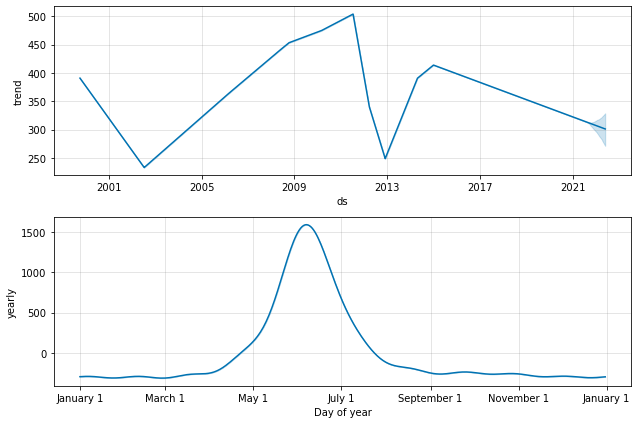

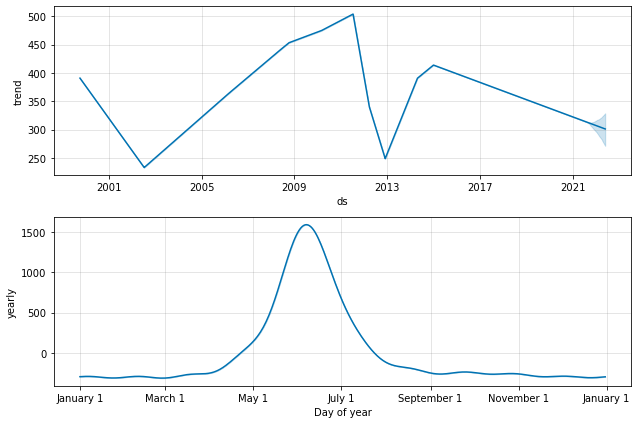

In [15]:
# let's take a better look at this with FB's Prophet - not considering any other regressors yet
from fbprophet import Prophet
m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
m_fb.fit(flow)
future = m_fb.make_future_dataframe(periods=365)
forecast = m_fb.predict(future)
m_fb.plot_components(forecast)

Next steps: how do I get the min / max / median / mean from each independent calendar day? <br>
<br>
Perhaps group by month and day